In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  # 3D表示に使う
from scipy import linalg  # linalg.solve(A, b) 　Ax = bの解を求める関数

# y = w[0] + w[1]x[1] + w[2]x[2]型。
# 今回はw = [1, 2, 3]とする。
X = np.random.random((100, 2)) * 10  # 0から1*10の範囲をとる100*2の行列
y = 1 + 2 * X[:, 0] + 3 * X[:, 1] + np.random.randn(100)
# x0とx1の座標からyを作成。randnで本来の値にノイズを加えている。


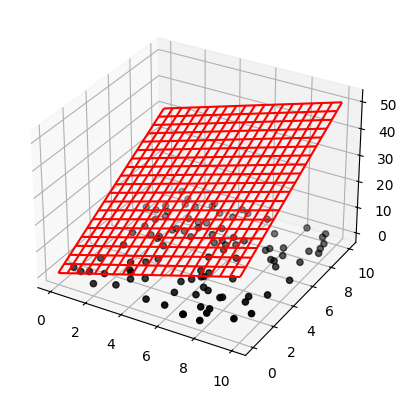

[[8.91360729e-01 7.66004526e+00]
 [3.17928320e+00 9.42848813e+00]
 [3.74759444e+00 6.27222106e+00]
 [5.63231461e+00 7.28341878e+00]
 [1.48033888e+00 7.81629198e+00]
 [1.12318375e+00 1.01700074e+00]
 [7.88254588e+00 5.18718655e-03]
 [1.87416805e+00 2.04390178e-01]
 [7.79019935e+00 1.08709905e+00]
 [2.90617884e+00 1.96913565e+00]
 [1.08203368e+00 9.94117013e+00]
 [6.69025369e+00 5.64503323e+00]
 [5.77905609e+00 6.00250014e+00]
 [9.28537175e-01 2.32969717e+00]
 [2.36189369e+00 5.52775512e+00]
 [3.19803368e+00 1.44636550e+00]
 [1.01437810e+00 5.16956749e+00]
 [8.21530479e+00 6.38344070e+00]
 [9.88780759e+00 5.17428586e+00]
 [9.98066637e+00 8.06395314e+00]
 [5.63205369e+00 1.48347297e+00]
 [1.92455018e+00 5.44274864e+00]
 [7.58589263e+00 7.00731265e+00]
 [4.69814767e+00 7.74001493e+00]
 [2.76422278e+00 7.73836713e+00]
 [7.85368638e+00 7.09614809e-01]
 [3.18813479e+00 6.58676786e+00]
 [9.18658140e+00 9.35649036e-01]
 [1.63231662e+00 7.34668529e+00]
 [3.85446647e+00 8.99832291e+00]
 [2.735847

In [5]:
Xtil = np.c_[
    np.ones(X.shape[0]), X
]  # Xの行列の左端に[1,1,1,...,1]^Tを加える。(7)式を確認しよう

A = np.dot(Xtil.T, Xtil)  # 標準形A,bに当てはめる。
b = np.dot(Xtil.T, y)
w = linalg.solve(A, b)  # (8)式をwについて解く。

xmesh, ymesh = np.meshgrid(np.linspace(0, 10, 20), np.linspace(0, 10, 20))
zmesh = (w[0] + w[1] * xmesh.ravel() + w[2] * ymesh.ravel()).reshape(xmesh.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 0], X[:, 1], y, color="k")
ax.plot_wireframe(xmesh, ymesh, zmesh, color="r")
plt.show()

print(X)
# [8.91360729e-01 7.66004526e+00]
#  [3.17928320e+00 9.42848813e+00]
#  [3.74759444e+00 6.27222106e+00]
# print(X[:, 0])
# 0.89136073 3.1792832  3.74759444
